In [1]:
from pathlib import Path
import sys

helper_utils = Path(Path.cwd(), 'utils')
sys.path.append(str(helper_utils))

import utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

checker = utils.core.ExerciseChecker("SE02")

Faculty of Science and Engineering 🔬
The University of Manchester 
Invoking utils version: 0.8.0


![](figs/se_02.png)
# Workshop Instructions
***
- <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> Follow along by typing the code yourself - this helps with learning!
- <img src="figs/icons/code.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(2000%) hue-rotate(40deg) brightness(915%) contrast(100%);"/> Code cells marked as "Exercise" are for you to complete
- <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> Look for hints if you get stuck
- <img src="figs/icons/success.svg" width="20" style="filter: invert(56%) sepia(71%) saturate(5293%) hue-rotate(117deg) brightness(95%) contrast(101%);"/> Compare your solution with the provided answers
- <img src="figs/icons/list.svg" width="20" style="filter: invert(19%) sepia(75%) saturate(6158%) hue-rotate(312deg) brightness(87%) contrast(116%);"/> Don't worry if you make mistakes - debugging is part of learning!

# Artificial Neural Networks
***
Artificial Neural Networks (ANNs) are a class of machine learning models inspired by the structure and function of the human brain. They consist of interconnected nodes (neurons) organized in layers, which process and learn from data. ANNs are the foundation of deep learning. 


<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\ann.png" alt="Artificial Neural Networks" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

## Neurons
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Neurons are the basic building blocks of ANNs, similar to biological neurons. Each neuron receives inputs, applies a transformation, and produces an output.

The basic shape of a neuron can be seen in the following figure:

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\single_neuron.png" alt="Single Neuron" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

The neuron takes an input vector $ X $  and applies a linear transformation using weights $ W $ and biases $ b $. Let us first consider the case of a single neuron without any activation function. The output of the neuron can be expressed as:

$$ y = W \cdot X + b$$

Where:
- $ y $ is the output of the neuron.
- $ W $ is the weight vector, which determines the strength of the connections between the inputs and the neuron.
- $ X $ is the input vector, which represents the features of the data.
- $ b $ is the bias term, which allows the neuron to shift the activation function to better fit the data.
- $ \cdot $ represents the dot product between the weight vector and the input vector.

Using neurons in this fashion means that we can only solve linear problems. To solve non-linear problems, we need to add a non-linear activation function to the neuron. Thus, our enhanced neuron will look like this:

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\non_linenar_neuron.png" alt="Single Neuron" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

The output of the neuron after applying the activation function can be expressed as:
$$ \hat{y} = f(W \cdot X + b)$$

Where:
- $ f $ is the activation function, which introduces non-linearity to the output of the neuron. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit).
- $ \hat{y} $ is the output of the neuron after applying the activation function. We use the hat symbol to denote that this is the predicted output of the neuron. As we will see later, the predicted output of the neuron is not necessarily equal to the actual output of the neuron. The difference between the two is called the error.

Let's implement our neuron in python using PyTorch. We will create a class called `Neuron` that takes the input vector, weight vector, and bias term as arguments. The class will have a method called `forward` that computes the output of the neuron.

This is the first step in the training process, passing the inputs to the neuron and getting the output, and we will call this the *forward pass*.


In [2]:
# Exercise 1: Implementing a Neuron 🎯
# Implement:
# 1. The sigmoid function
# 2. The forward pass of a neuron
# 3. Create a neuron with the specified weights and bias
# 4. Define an input vector x with two features
# 5. Use the neuron to compute an output

def sigmoid(x:torch.Tensor) -> torch.Tensor:
    # The sigmoid function is defined as:
    # sigmoid(x) = 1 / (1 + exp(-x))
    return 1 / (1 + torch.exp(-x)) # Your code here

class Neuron:
    def __init__(self, weights:torch.Tensor, bias:torch.Tensor, activation:callable=sigmoid) -> None:
        # Initialize the neuron with weights, bias, and activation function
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        # 1. Compute the linear transformation:
        # 2. Apply the activation function to the result
        # 3. Return the output
        linear_output = x @ self.weights + self.bias # Your code here
        output = self.activation(linear_output) # Your code here
        return output # Your code here

# Example weights and bias
weights = torch.tensor([0, 1.0])
bias = torch.tensor([0.5])

# Create a neuron with the specified weights and bias
neuron = Neuron(weights, bias) # Your code here

# Define an input vector x with two features 
# with values 1.0, 2.0
x = torch.tensor([1.0, 2.0])  # Your code here

# Let's use our neuron to compute an output
output = neuron.forward(x) # Your code here

# Print the output to see the result
print(f"Output from neuron: {output}")

# ✅ Check your answer
answer = {
    'sigmoid': sigmoid,
    'neuron_output': output.item()
}
checker.check_exercise(1, answer)


Output from neuron: tensor([0.9241])
✅ sigmoid is correct!
✅ neuron_output is correct!

🎉 Excellent! All parts are correct!


## Weights and Biases
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Weights and biases are learnable parameters of a neural network. Weights determine the strength of connections between neurons, while biases allow the neuron to shift the activation function.

- The weight matrix has a shape of `(output_size, input_size)`, where output_size is the number of neurons in the layer and input_size is the number of features in the input data.
- The bias vector has a shape of `(output_size,)`. 

### Initialising Weights and Biases
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Initialising weights and biases is the process of assigning initial values to these parameters before training a neural network.

The importance of initialising weights and biases lies in the fact that they can significantly affect the convergence speed and performance of the neural network. Proper initialisation can help prevent issues such as vanishing or exploding gradients, which can hinder the training process.

| Initialisation Method | Formula | PyTorch Code | Description |
|-----------------------|----------|--------------|-------------|
| Xavier/Glorot Initialisation | $W \sim \mathcal{U}(-\sqrt{\frac{6}{n_{in} + n_{out}}}, \sqrt{\frac{6}{n_{in} + n_{out}}})$ | `torch.nn.init.xavier_uniform_(tensor)` | Suitable for sigmoid and tanh activations. |
| He Initialisation | $W \sim \mathcal{U}(-\sqrt{\frac{6}{n_{in}}}, \sqrt{\frac{6}{n_{in}}})$ | `torch.nn.init.kaiming_uniform_(tensor)` | Suitable for ReLU activations. |
| Kaiming Normal Initialisation | $W \sim \mathcal{N}(0, \sqrt{\frac{2}{n_{in}}})$ | `torch.nn.init.kaiming_normal_(tensor)` | Suitable for ReLU activations. |
| Kaiming Uniform Initialisation | $W \sim \mathcal{U}(-\sqrt{\frac{6}{n_{in}}}, \sqrt{\frac{6}{n_{in}}})$ | `torch.nn.init.kaiming_uniform_(tensor)` | Suitable for ReLU activations. |
| Zero Initialisation | $W = 0$ | `torch.nn.init.zeros_(tensor)` | All weights are set to zero. Not recommended. |
| Random Initialisation | $W \sim \mathcal{U}(-1, 1)$ | `torch.nn.init.uniform_(tensor)` | Weights are randomly initialised between -1 and 1. |

***
> <img src="figs/icons/code.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(2000%) hue-rotate(40deg) brightness(915%) contrast(100%);"/> **Snippet 1**: Initialising Weights and Biases

```python
weight = torch.randn(3, 2) # Random weight matrix of shape (3, 2)
bias = torch.randn(3) # Random bias vector of shape (3,)

weight = torch.nn.init.xavier_uniform_(weight) # Xavier initialisation
bias = torch.nn.init.zeros_(bias) # Zero initialisation

```


Standard Deviations:
Xavier Uniform: 0.0989
Xavier Normal: 0.0991
Kaiming Uniform: 0.1412
Kaiming Normal: 0.1404
✅ initialized_weights is correct!

🎉 Excellent! All parts are correct!


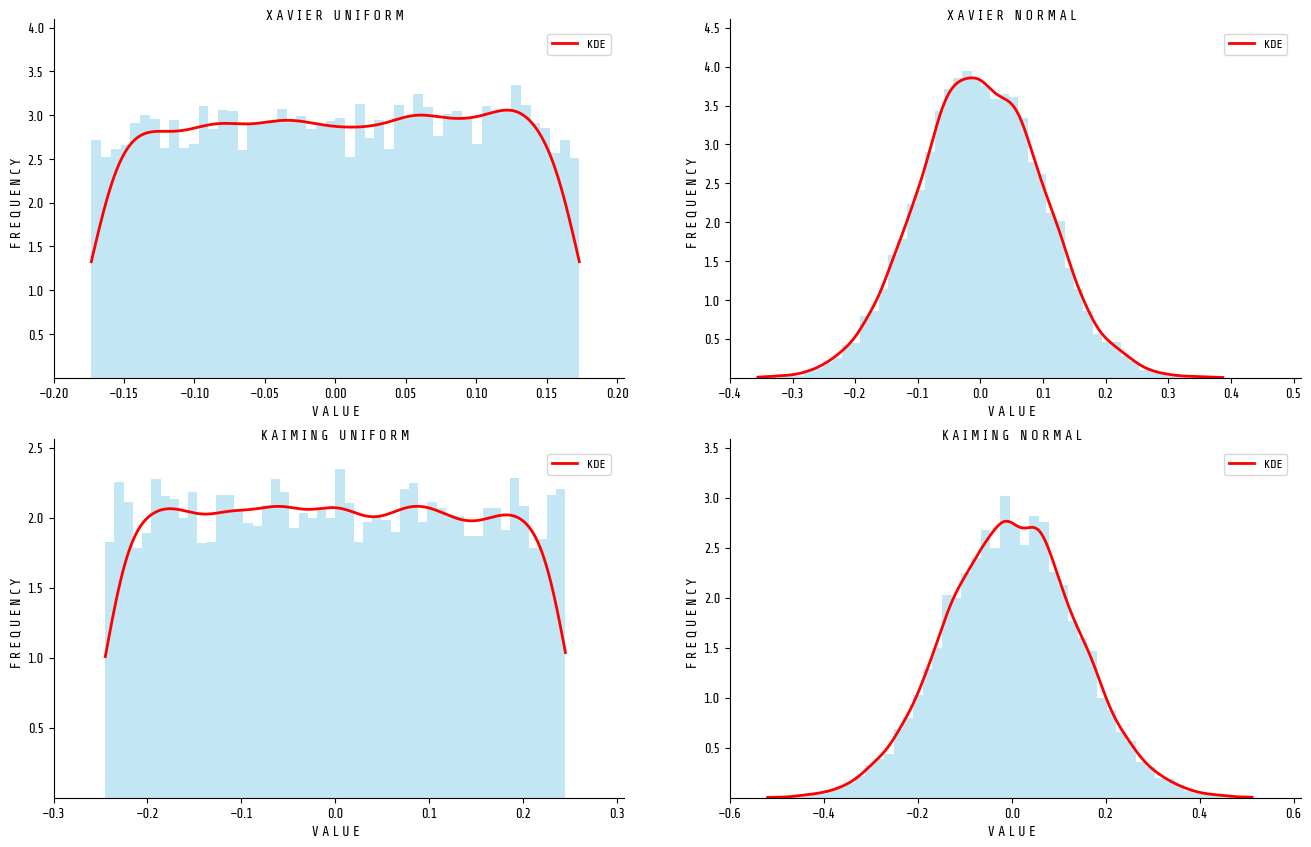

In [5]:
# Exercise 2: Weight Initialization Comparison 🎯
# Implement: 
# 1. A function to initialize weights using different methods
def initialize_weights(tensor, method='xavier_uniform'):
    """Initialize weights using the specified method.
    Args:
        tensor (torch.Tensor): Tensor to initialize
        method (str): Initialization method to use
    Returns:
        torch.Tensor: Initialized tensor
    """

    if method == 'xavier_uniform':
        return torch.nn.init.xavier_uniform_(tensor) # Your code here

    elif method == 'xavier_normal':
        return torch.nn.init.xavier_normal_(tensor) # Your code here

    elif method == 'kaiming_uniform':
        return torch.nn.init.kaiming_uniform_(tensor) # Your code here

    elif method == 'kaiming_normal':
        return torch.nn.init.kaiming_normal_(tensor) # Your code here

    else:
        raise ValueError(f'Unknown initialization method: {method}')

# Create empty tensors (100x100) for good distribution visualization
init_methods = {
    'Xavier Uniform': 'xavier_uniform',
    'Xavier Normal': 'xavier_normal',
    'Kaiming Uniform': 'kaiming_uniform',
    'Kaiming Normal': 'kaiming_normal'
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

# Test each initialization method
initialized_weights = {}
for i, (name, method) in enumerate(init_methods.items()):
    # Create empty tensor
    w = torch.empty(100, 100)
    
    # Initialize using your function
    w = initialize_weights(w, method)
    initialized_weights[name] = w
    
    # Plot distribution
    utils.plotting.plot_distribution(w.numpy().flatten(), 
                                    title=name, 
                                    ax=axes[i], 
                                    bins=50, 
                                    kdensity=True,
                                    )

# Calculate and print standard deviations
print("\nStandard Deviations:")
for name, w in initialized_weights.items():
    print(f"{name}: {w.std().item():.4f}")

# ✅ Check your answer
answer = {
    'initialized_weights': {
        name: {'std': w.std().item()} for name, w in initialized_weights.items()
    }
}
checker.check_exercise(2, answer)

## Layers
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: A layer is a collection of neurons that work together to process input data. Layers are the building blocks of neural network architectures.

In order to create a Neural Network we need to stack multiple neurons together, forming layers. Each layer performs a specific transformation on its input and passes the result to the next layer. This hierarchical organization allows neural networks to learn increasingly complex representations.

### Types of Layers
A simple ANN consists of three main types of layers:

1. **Input Layer**:
   - First layer in the network
   - Number of neurons equals the number of input features
   - Doesn't perform any computation, just passes input to next layer

2. **Hidden Layers**:
   - Intermediate layers between input and output
   - Can have multiple hidden layers (deep neural network)
   - Each neuron connects to every neuron in previous and next layer
   - Apply non-linear transformations through activation functions
   - Number of neurons can vary by layer

3. **Output Layer**:
   - Final layer in the network
   - Number of neurons equals number of desired outputs
   - Activation function depends on task (e.g., sigmoid for binary classification)

### Layer Connections
In a fully connected (dense) layer:
- Each neuron connects to every neuron in adjacent layers
- For layer l with n[l] neurons and layer l+1 with n[l+1] neurons:
  - Number of weights = n[l] × n[l+1]
  - Number of biases = n[l+1]

### Layer Computation
For each layer l, the computation follows these steps:
1. Linear combination: Z[l] = W[l]A[l-1] + b[l]
   - W[l] is the weight matrix
   - A[l-1] is the activation from previous layer
   - b[l] is the bias vector

2. Activation: A[l] = g(Z[l])
   - g is the activation function
   - A[l] is the layer's output

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\layers.png" alt="ANN layers" align="center" style="width: 20%; height: auto; margin: 0 auto;">
</figure>

We use the `torch.nn` module to create our layers. Common layer types include:
- `torch.nn.Linear`: Fully connected layer performing Wx + b
- `torch.nn.Conv2d`: Convolutional layer for spatial data
- `torch.nn.BatchNorm`: Normalizes layer inputs for stable training
- `torch.nn.Dropout`: Randomly deactivates neurons for regularization


In [ ]:
# Exercise 2: Working with Layers 🎯
# Create a fully connected layer and set weights to match our neuron

# TODO: Create a layer with 2 input features and 1 output feature
layer = torch.nn.Linear(in_features=2, out_features=1)

# TODO: Set the layer's weight parameter to match our neuron's weights
# Hint: You need to reshape the weights to have the right dimensions (1 row, 2 columns)
layer.weight = torch.nn.Parameter(weights.reshape(1, 2))

# TODO: Set the layer's bias parameter to match our neuron's bias
layer.bias = torch.nn.Parameter(bias)

# TODO: Pass the input x through the layer and apply the sigmoid activation
# Hint: This should produce the same result as our neuron's forward method
output = torch.sigmoid(layer(x))

# Print the output to verify it matches the expected result
print(output)

# ✅ Check your answer
answer = {
    'layer': {
        'in_features': layer.in_features,
        'out_features': layer.out_features
    },
    'output': output
}
checker.check_exercise(2, answer)

tensor([0.9241], grad_fn=<SigmoidBackward0>)
❌ Missing initialized_weights
💡 Hint: Use torch.nn.init functions for initialization


In [ ]:
# Alternatively, we can use the built-in sigmoid function in PyTorch
output = torch.sigmoid(layer(x)) # 1 output
print(output)

tensor([0.9241], grad_fn=<SigmoidBackward0>)


> <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> **Note**: The output of the layer in this case returns a tensor and `grad_fn` which is a reference to the function that created the tensor. This is used by PyTorch to keep track of the operations that have been performed on the tensor. This is important for the training process as it allows PyTorch to compute the gradients of the loss function with respect to the model parameters.

## Backpropagation
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Backpropagation is an algorithm used to train neural networks by computing gradients of the loss with respect to parameters and updating them to minimize the loss.

### Training Process Overview
The training process consists of two main passes:

1. **Forward Pass**:
   - Input data flows through network from input to output
   - Each layer computes: Z[l] = W[l]A[l-1] + b[l]
   - Applies activation: A[l] = g(Z[l])
   - Final layer produces prediction ŷ
   - Loss L(ŷ, y) is computed

2. **Backward Pass**:
   - Gradients flow backwards through network
   - Uses chain rule to compute partial derivatives
   - Updates weights and biases using gradients

### Gradient Computation Steps
For each layer l, from last to first:

1. **Output Layer**:
   - Compute loss gradient: dL/dA[L]
   - Find activation gradient: dA[L]/dZ[L]
   - Calculate error: δ[L] = dL/dA[L] * dA[L]/dZ[L]

2. **Hidden Layers**:
   - Propagate error: δ[l] = (W[l+1]^T δ[l+1]) * g'(Z[l])
   - Compute weight gradients: dL/dW[l] = δ[l] A[l-1]^T
   - Compute bias gradients: dL/db[l] = δ[l]

3. **Parameter Updates**:
   - W[l] = W[l] - α * dL/dW[l]
   - b[l] = b[l] - α * dL/db[l]
   - α is the learning rate

### Chain Rule Application
For a simple network with MSE loss:
```
Loss = (y - ŷ)²
ŷ = g(Wx + b)
```

Gradient computation chain:
```
dL/dW = dL/dŷ * dŷ/dz * dz/dW
      = -2(y - ŷ) * g'(z) * x
```

PyTorch automates this process through its autograd system:
1. Builds computational graph during forward pass
2. Computes gradients automatically with backward()
3. Updates parameters using optimizer.step()

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\loss_func.png" alt="Optimiser algorithm" align="center" style="width: 70%; height: auto; margin: 0 auto;">
</figure>

In [ ]:
# Exercise 1: Create a simple neural network with PyTorch's nn module 🎯
import torch
import torch.nn as nn

# Create a dataset of 100 points following y = 2x + noise
x = torch.linspace(-10, 10, 100).reshape(-1, 1)
y = 2 * x + torch.randn_like(x) * 0.5

# TODO: Create a simple neural network with one input and one output
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # One input, one output

    def forward(self, x):
        return self.linear(x)

# Create model instance
model = SimpleNN()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train for 100 epochs
for epoch in range(100):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# Test the model
test_x = torch.tensor([[5.0]])
predicted = model(test_x)
print(f'Prediction for x=5: {predicted.item():.2f}')

Epoch 10, Loss: 0.7217
Epoch 20, Loss: 0.5733
Epoch 30, Loss: 0.4741
Epoch 40, Loss: 0.4079
Epoch 50, Loss: 0.3638
Epoch 60, Loss: 0.3343
Epoch 70, Loss: 0.3146
Epoch 80, Loss: 0.3014
Epoch 90, Loss: 0.2927
Epoch 100, Loss: 0.2868
Prediction for x=5: 9.97


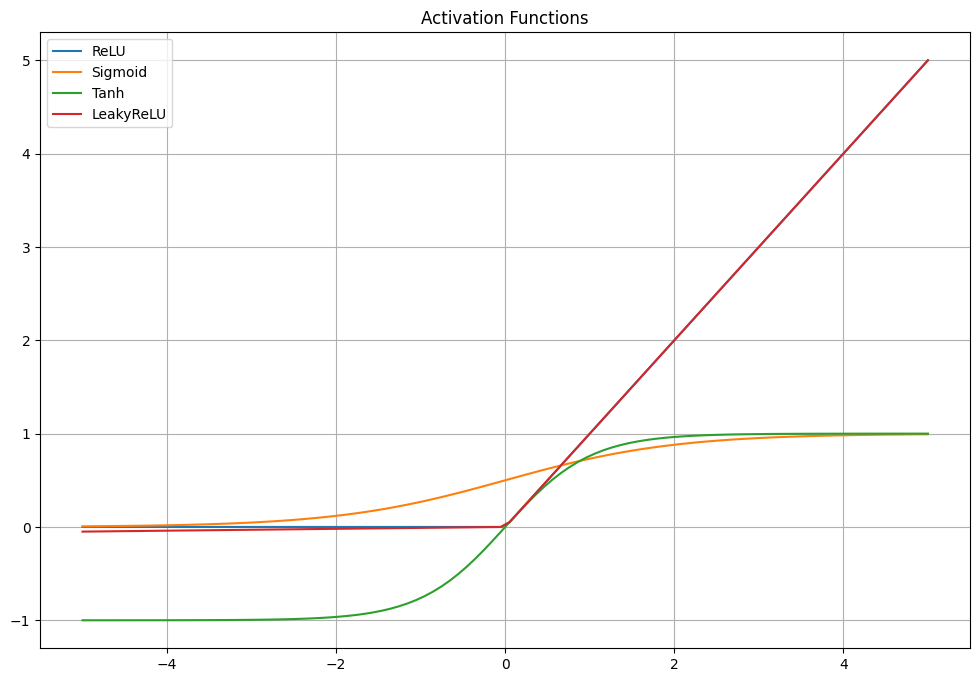

In [ ]:
# Exercise 2: Experiment with different activation functions 🎯
import torch
import torch.nn as nn

# Create sample input
x = torch.linspace(-5, 5, 100)

# TODO: Test different activation functions
activations = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU()
}

# Apply each activation and plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for name, activation in activations.items():
    y = activation(x)
    plt.plot(x.numpy(), y.numpy(), label=name)

plt.grid(True)
plt.legend()
plt.title('Activation Functions')
plt.show()

In [ ]:
# Exercise 3: Understanding backpropagation 🎯
import torch

# Create tensors with gradients
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Define a complex function
z = x**2 * y + torch.sin(x * y) 

# Compute gradients
z.backward()

print(f'dz/dx: {x.grad}')
print(f'dz/dy: {y.grad}')

# Reset gradients
x.grad.zero_()
y.grad.zero_()

dz/dx: 14.880510330200195
dz/dy: 5.920340538024902


tensor(0.)

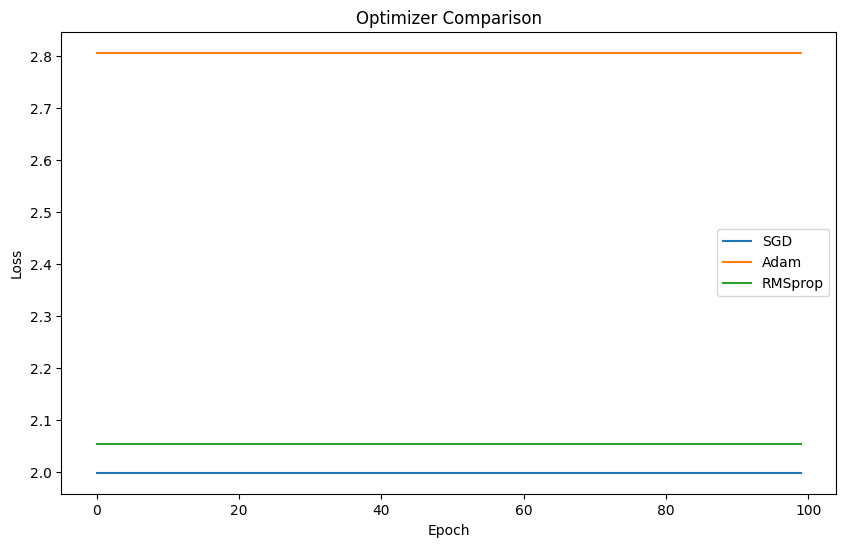

In [ ]:
# Exercise 4: Compare different optimizers 🎯
import torch
import torch.nn as nn

# Create a simple model
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

# Create synthetic data
X = torch.randn(100, 2)
y = (X[:, 0] + X[:, 1]).reshape(-1, 1)

# Test different optimizers
optimizers = {
    'SGD': torch.optim.SGD(model.parameters(), lr=0.01),
    'Adam': torch.optim.Adam(model.parameters(), lr=0.01),
    'RMSprop': torch.optim.RMSprop(model.parameters(), lr=0.01)
}

# Train and compare
losses = {name: [] for name in optimizers.keys()}

for name, optimizer in optimizers.items():
    model = nn.Sequential(
        nn.Linear(2, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )
    
    for epoch in range(100):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = nn.MSELoss()(y_pred, y)
        loss.backward()
        optimizer.step()
        losses[name].append(loss.item())

# Plot results
plt.figure(figsize=(10, 6))
for name, loss_values in losses.items():
    plt.plot(loss_values, label=name)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimizer Comparison')
plt.show()

In [ ]:
# Exercise 5: Implement different regularization techniques 🎯
import torch
import torch.nn as nn

# Create a model with dropout
class RegularizedNN(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super().__init__()
        self.linear1 = nn.Linear(10, 20)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.dropout(x)
        return self.linear2(x)

# Create synthetic data
X = torch.randn(1000, 10)
y = (X.sum(dim=1) + torch.randn(1000) * 0.1).reshape(-1, 1)

# Train with L1 and L2 regularization
model = RegularizedNN()
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

for epoch in range(100):
    model.train()
    y_pred = model(X)
    mse_loss = criterion(y_pred, y)
    
    # Add L1 regularization
    l1_lambda = 0.01
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    
    # Add L2 regularization
    l2_lambda = 0.01
    l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
    
    loss = mse_loss + l1_lambda * l1_norm + l2_lambda * l2_norm
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

Epoch 10, Loss: 10.3014
Epoch 20, Loss: 9.9971
Epoch 30, Loss: 9.7138
Epoch 40, Loss: 9.4142
Epoch 50, Loss: 9.0787
Epoch 60, Loss: 8.7660
Epoch 70, Loss: 8.3985
Epoch 80, Loss: 7.9909
Epoch 90, Loss: 7.6237
Epoch 100, Loss: 7.1458


## Optimizers
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Optimizers are algorithms used to update the model parameters during training to minimize the loss function.

The optimizer algorithm is used to update the model parameters during training. Most optimizers use a version of gradient descent to update the model parameters. The goal of the optimizer is to minimize the loss function by adjusting the weights and biases of the model. The most commonly used optimizers include:

- **Stochastic Gradient Descent (SGD):** A simple and widely used optimizer that updates the model parameters using the gradients of the loss function.
- **Adam:** An adaptive learning rate optimizer that combines the benefits of both SGD and RMSProp. It is widely used in deep learning applications due to its efficiency and effectiveness.
- **RMSProp:** An adaptive learning rate optimizer that adjusts the learning rate based on the average of recent gradients. It is particularly useful for training deep neural networks.
- **Adagrad:** An adaptive learning rate optimizer that adjusts the learning rate based on the historical gradients. It is particularly useful for sparse data.

### Learning Rate
The learning rate is a hyperparameter that determines the step size at each iteration while moving toward a minimum of the loss function. A small learning rate may lead to slow convergence, while a large learning rate may cause the model to diverge. It is important to choose an appropriate learning rate for the optimizer to work effectively.

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\learning_rate.png" alt="Gradient Descent" align="center" style="width: 50%; height: auto; margin: 0 auto;">
</figure>

## Regularization Methods
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Regularization techniques are used to prevent overfitting in neural networks by adding constraints to the model parameters.

Regularization adds a penalty term to the loss function to discourage complex models. Common regularization techniques include:

- **L1 Regularization:** Adds the absolute value of the weights to the loss function. This encourages sparsity in the model parameters.
- **L2 Regularization:** Adds the squared value of the weights to the loss function. This discourages large weights and encourages smoothness in the model parameters.
- **Dropout:** Randomly drops a fraction of the neurons during training to prevent co-adaptation of neurons. This encourages the model to learn more robust features.
- **Early Stopping:** Monitors the validation loss during training and stops the training process when the validation loss starts to increase. This prevents overfitting by stopping the training process before the model starts to memorize the training data.

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\losses.png" alt="L1 and L2 losses" align="center" style="width: 50%; height: auto; margin: 0 auto;">
</figure>

#### Normalisation
***
Normalisation is a crucial step in the pre-processing of data for machine learning models. It involves scaling the input features to a similar range, which helps improve the convergence speed and performance of the model. In this notebook, we will use Min-Max normalization to scale the input features to a range of [0, 1]. The formula for Min-Max normalization is as follows:
$$ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

Where:
- $ X_{norm} $ is the normalized value.
- $ X$ is the original value.
- $ X_{min} $ is the minimum value of the feature.
- $ X_{max} $ is the maximum value of the feature.

The normalisation parameters will be computed from the training set and then applied to the validation and test sets. This helps to prevent data leakage and ensures that the model is evaluated on unseen data. 